# Predicting Heart Disease Diagnosis

### Introduction 

The cardiovascular system encompasses an intricate network of blood vessels, including veins, arteries, and capillaries, which facilitate the circulation of blood throughout the body. Any disruptions in the flow of blood emanating from the heart can lead to various forms of heart diseases, collectively referred to as cardiovascular or heart diseases. Globally, heart diseases constitute a leading cause of mortality - the World Health Organization (WHO) indicates that approximately 17.5 million deaths annually are attributable to heart attacks and strokes. Consequently, the early detection of cardiac anomalies is imperative as it can significantly save lives and assist healthcare professionals in crafting effective treatment strategies. 

In this study, we will examine a dataset that contains test results from 303 patients referred for coronary angiography at the Cleveland Clinic in Ohio between May 1981 and September 1984. All the patients had similar medical profiles and underwent the same non-invasive tests, namely, exercise electrocardiogram, exercise thallium scintigraphy and fluoroscopy for coronary calcium. 

The clinical and test variables included in this dataset are per the below, while the target variable is the angiographic disease status `num`, where the value 0 corresponds to the major vessels show less than 50% narrowing of the vessels diameter while the values 1 and more correspond to showing greater than 50% narrowing of the vessels diameter.

The variables represent the following <br>
**Demographic Information:**
- Age (`age`)
- Sex (`sex`)
    - 1 = Male
    - 0 = Female

**Clinical Information:**
- Chest Pain Type (`cp`)
    - 1 = Typical Anginal
    - 2 = Atypical Anginal
    - 3 = Nonanginal
    - 4 = Asymptomatic
- Systolic Blood Pressure (`trestbps`) - in mmHg on admission to the hospital

**Routine Test Data Collected:**
- Serum Cholesterol Determination (`chol`) - in mg/dl
- Fasting Blood Sugar Determination (`fbs`) - fasting blood sugar > 120 mg/dl)
    - 1 = True
    - 0 = False
- Resting Electrocardiographic Results (`restecg`)
    - 0 = Normal
    - 1 = Having ST-T Wave Abnormality
    - 2 = Showing Probable or Definite Left Ventricular Hypertrophy by Estes’ Criteria

**Exercise Test Data Collected:**
- Maximum Heart Rate Achieved (`thalach`) - in beats per minute
- Exercise Induced Angina (`exang`)
    - 1 = Yes
    - 0 = No
- ST Depression Induced by Exercise Relative to Rest (`oldpeak`)
- Slope of the Peak Exercise ST Segment (`slope`)
    - 1 = Upsloping
    - 2 = Flat
    - 3 = Downsloping

**Other Non-invasive Test Data Collected:**
- Number of Major Vessels Colored by Fluoroscopy for Coronary Calcium (`ca`) - 0 to 3
- Exercise Thallium Scintigraphy Results (`thal`)
    - 3 = Normal
    - 6 = Fixed Defect
    - 7 = Reversible Defect


In this study, we will address the predictive question: can we use clinical and test data available to us to predict a diagnosis of heart disease. This is important as it provides a quick and data-driven method to diagnose heart disease and eliminates subjectivity and dependence on the skill and experience of the diagnosing physician. 

Therefore we decided to define that we can use clinical and test data to predict a diagnosis of heart
disease when the accuracy is greater than 55%. When the accuracy is lower than 55% we cannot use it to predict.

### Methods and Results

Describe in written English the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.
your report should include code which:
- loads data from the original source on the web - DONE
- wrangles and cleans the data from it's original (downloaded) format to the -format necessary for the planned analysis - DONE
- performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis - 
- creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
- performs the data analysis
- creates a visualization of the analysis 
- note: all tables and figure should have a figure/table number and a legend

In [1]:
install.packages("kknn")
install.packages("GGally")


library(tidyverse)
library(repr)
library(tidymodels)
library(kknn)
library(GGally)
library(dplyr)


options(repr.matrix.max.rows = 6)
set.seed(9999)

Installing package into 'C:/Users/rtian/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependencies 'magrittr', 'pkgconfig', 'cpp11', 'igraph'




package 'magrittr' successfully unpacked and MD5 sums checked
package 'pkgconfig' successfully unpacked and MD5 sums checked
package 'cpp11' successfully unpacked and MD5 sums checked
package 'igraph' successfully unpacked and MD5 sums checked
package 'kknn' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rtian\AppData\Local\Temp\RtmpCaNqKP\downloaded_packages


Installing package into 'C:/Users/rtian/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependencies 'stringi', 'colorspace', 'isoband', 'tibble', 'withr', 'generics', 'R6', 'tidyselect', 'purrr', 'stringr', 'forcats', 'patchwork', 'Rcpp', 'hms', 'prettyunits', 'farver', 'labeling', 'munsell', 'viridisLite', 'ggplot2', 'dplyr', 'tidyr', 'ggstats', 'gtable', 'plyr', 'progress', 'RColorBrewer', 'scales'




package 'stringi' successfully unpacked and MD5 sums checked
package 'colorspace' successfully unpacked and MD5 sums checked
package 'isoband' successfully unpacked and MD5 sums checked
package 'tibble' successfully unpacked and MD5 sums checked
package 'withr' successfully unpacked and MD5 sums checked
package 'generics' successfully unpacked and MD5 sums checked
package 'R6' successfully unpacked and MD5 sums checked
package 'tidyselect' successfully unpacked and MD5 sums checked
package 'purrr' successfully unpacked and MD5 sums checked
package 'stringr' successfully unpacked and MD5 sums checked
package 'forcats' successfully unpacked and MD5 sums checked
package 'patchwork' successfully unpacked and MD5 sums checked
package 'Rcpp' successfully unpacked and MD5 sums checked
package 'hms' successfully unpacked and MD5 sums checked
package 'prettyunits' successfully unpacked and MD5 sums checked
package 'farver' successfully unpacked and MD5 sums checked
package 'labeling' successful

ERROR: Error in library(tidyverse): there is no package called 'tidyverse'


In [7]:
heart_disease <- read_csv("https://raw.githubusercontent.com/Mikeee12138/Group-Project-dsci100/main/processed.cleveland.data", col_names = FALSE)

colnames(heart_disease) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

heart_disease

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


<font size="1"> Table 1 - Heart Disease Dataset

The dataset appears to be clean and wrangled into a tidy format with the addition of the column headers. 
However, the two columns `ca` and `thal` appear to contain missing values signified by a "?" character. We shall filter the training dataset so that all the rows with missing values are eliminated. We will also change the type of the `ca` variable from to numeric so we can use numeric analysis methods on it and we will convert the categorical variable `num` into a factor.

In [9]:
heart_disease_filtered <- heart_disease |>
    filter(ca != "?", thal != "?") |> 
    mutate(ca = as.numeric(ca), num = as_factor(num))

heart_disease_filtered

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1,3.0,1


<font size="1"> Table 2 - Heart Disease Data Set Filtered

Our categorical variable `num` is already factorized. However, since the intention of our analysis is to predict whether the target value is 0, signifying <50% of diameter narrowing in the major vessels (i.e., no heart disease) or not, we can assign the non-zero values to the value 1. This is done to improve the accuracy of our classification since all other values imply heart disease at different extents but our prediction is strictly concerned with its existence.

In [10]:
heart_disease_filtered['num'][heart_disease_filtered['num'] == '2'] <- '1'
heart_disease_filtered['num'][heart_disease_filtered['num'] == '3'] <- '1'
heart_disease_filtered['num'][heart_disease_filtered['num'] == '4'] <- '1'
heart_disease_filtered

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3.0,1
67,1,4,120,229,0,2,129,1,2.6,2,2,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2,7.0,1
57,1,4,130,131,0,0,115,1,1.2,2,1,7.0,1
57,0,2,130,236,0,2,174,0,0.0,2,1,3.0,1


<font size="1"> Table 3 - Heart Disease Data Set Filtered and Target Variable Factorized

Exploring this dataset further and in anticipation of the mutli-class classification with k-nn to follow, we check to see there are fairly equal number of observations in each class as that could have a negative effect on the accuracy score our classifier. We produce the following table to illustrate the number of each observation in the two classes.

In [11]:
counts <- group_by(heart_disease_filtered, num) |>
    summarize(count = n())
counts

num,count
<fct>,<int>
0,160
1,137


<font size = "1"> Table 4 - Number of Observations in each Class

Based on the above table, we see that the numbers of observations are within 14% from each other, implying that the classes are within an acceptable weighting on the data.

As part of the balance of the exploratory data analysis, we will split the data into a training and test set, with `num` being the variable we want to classify.

In [12]:
heart_disease_split <- initial_split(heart_disease_filtered , prop = 0.75, strata = num) 
    heart_disease_train <- training(heart_disease_split)   
    heart_disease_test<- testing(heart_disease_split)
    heart_disease_train

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6.0,0
37,1,3,130,250,0,0,187,0,3.5,3,0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,0,4,140,241,0,0,123,1,0.2,2,0,7.0,1
45,1,1,110,264,0,0,132,0,1.2,2,0,7.0,1
57,1,4,130,131,0,0,115,1,1.2,2,1,7.0,1


<font size = "1"> Table 5 - Training Data Set

Now for this study, we will conduct a classification prediction using the six non-categorical variables included in the above table. Categorical variables will not be used as they are not scaled and can lead to skewing the output, which leaves us with the following predictors: `age`, `trestbps`, `chol`, `thalach`, `oldpeak`, and `ca`.

Before proceeding any further, we select the relevant columns from our training data set (six predictor variables and one target variable).

In [14]:
heart_disease_train_predict <- select(heart_disease_train, age, trestbps, chol, thalach, oldpeak, ca, num)

Using only the observations in the training data set, we use the ggpairs library to create a pairplot of all the columns we are interested in including in our models. 

From the last column, we can gather the relationship between the predictor variables and our target variable`num`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


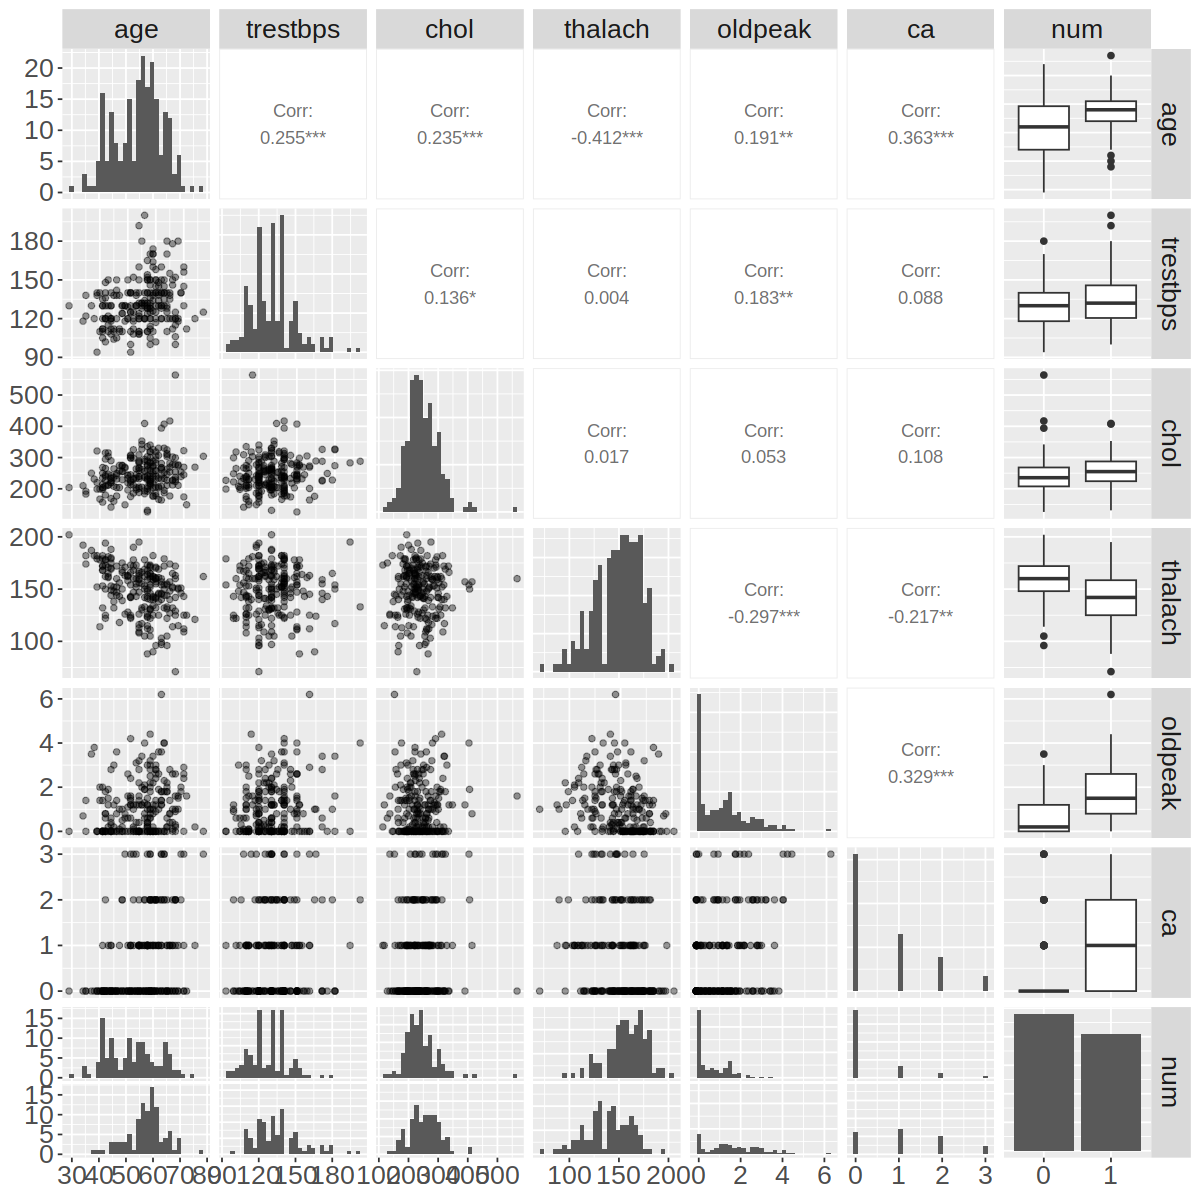

In [15]:
options(repr.plot.width = 10, repr.plot.height = 10)

  heart_disease_pairplot <- heart_disease_train_predict|> 
      ggpairs(
          lower = list(continuous = wrap('points', alpha = 0.4)),
          diag = list(continuous = "barDiag")
      ) +
      theme(text = element_text(size = 20))
heart_disease_pairplot 

<font size = "1"> Figure 1 - Training Data Set Pairs Plot

Looking at the results produced from this plot, we see that in general the predictor variables have little to no correlation between them signified by the coefficients being close to 0 for the most part. However, we see that the variable `thalach` (maximum heart rate achieved) has a noticeable negative correlation with `age` and `oldpeak` where as age and ST depression induced by exercise increase, maximum heart rate tends to decrease. 

More importantly, we see that the variable `ca` (number of major vessels colored by fluoroscopy) shows a positive correlation with our target variable, suggesting that as the number of detected vessels increases, so does the likelihood of a heart disease diagnosis.

With the preliminary exploration of our data complete, we are now ready to determine a grouping of our classification models. We believe that a beneficial way to approach the problem at hand would be to group our predictors by the testing data techniques.

As such, the first model will include `age`, `trestbps`, and `chol` as they are all either clinical or routine test data results. The second model will include `thalach` and `oldpeak` as they are exercise induced data results, and lastly `ca` will be in its own model as it refers to the fluoroscopy for coronary calcium results and our exploration revealed that it already has positive correlation with our target variable.

We now begin with the analysis of our data. It is important to note that we will be explicitly outlining the steps for our first model only as the other two models will follow the same procedure. 

**First Model：`age`, `trestbps`, and `chol` (all either clinical or routine test data results.)**

Our first step is to create a recipe that uses all the predictors in our model and a model specification with tuning on the number of neighbours.

In [16]:
# recipe
heart_disease_recipe_1 <- recipe(num ~ age + trestbps + chol , data = heart_disease_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())
heart_disease_recipe_1

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [17]:
# model specification
heart_disease_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
       set_engine("kknn") |>
       set_mode("classification")

Next, we perform a 5-fold cross-validation on the training set and we determine a range of possible "k" values (neighbors). We choose to try "k" to be between 1 and 20.

In [20]:
#cross validation with v = 5
heart_disease_vfold <- vfold_cv(heart_disease_train, v = 5, strata = num)

In [21]:
#set up possible values of k
k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

Then, we create a workflow analysis with our recipe and model specification across the range of our "k" values. We also collect the metrics from this workflow analysis and filter for `accuracy` from the `.metric` column to use it to determine accuracies in the next steps.

In [22]:
#finding accuracies
knn_results <- workflow() |>
      add_recipe(heart_disease_recipe_1) |>
       add_model(heart_disease_spec) |>
       tune_grid(resamples = heart_disease_vfold, grid = k_vals) |>
       collect_metrics()

! Fold1: internal:
  There were 20 warnings in `dplyr::summarise()`.
  The first warning was:
  ℹ In argument: `.estimate = metric_fn(...)`.
  ℹ In group 1: `neighbors = 1`.
  Caused by warning:
  ! No observations were detected in `truth` for level(s): '2'...
  Computation will proceed by ignoring those levels.
  ℹ Run `dplyr::last_dplyr_warnings()` to see the 19 ...

! Fold2: internal:
  There were 20 warnings in `dplyr::summarise()`.
  The first warning was:
  ℹ In argument: `.estimate = metric_fn(...)`.
  ℹ In group 1: `neighbors = 1`.
  Caused by warning:
  ! No observations were detected in `truth` for level(s): '2'...
  Computation will proceed by ignoring those levels.
  ℹ Run `dplyr::last_dplyr_warnings()` to see the 19 ...

! Fold3: internal:
  There were 20 warnings in `dplyr::summarise()`.
  The first warning was:
  ℹ In argument: `.estimate = metric_fn(...)`.
  ℹ In group 1: `neighbors = 1`.
  Caused by warning:
  ! No observations were detected in `truth` for level(s): '2

In [26]:
#filtering for only accuracy
accuracies <- knn_results |> 
       filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.5535354,5,0.02800231,Preprocessor1_Model01
2,accuracy,multiclass,0.5535354,5,0.02800231,Preprocessor1_Model02
3,accuracy,multiclass,0.5718182,5,0.02143605,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
18,accuracy,multiclass,0.6258586,5,0.02400313,Preprocessor1_Model18
19,accuracy,multiclass,0.6259596,5,0.02147302,Preprocessor1_Model19
20,accuracy,multiclass,0.6259596,5,0.02147302,Preprocessor1_Model20


<font size = "1"> Table 6 - Aggregated Mean and Std. Error across the Folds (Model 1)

Lastly, we determine the max accuracy value to guide us to picking the optimal number of neighbors in our prediction. We can plot the `accuracies` data set with `neighbors` on the x-axis and the `mean` on the y-axis, or we can produce the maximum mean value and use its corresponding neighbor. We do both below.

In [27]:
#finding max accuracy
max_accuracy <- summarize(accuracies, accuracy = max(mean))
max_accuracy

accuracy
<dbl>
0.6259596


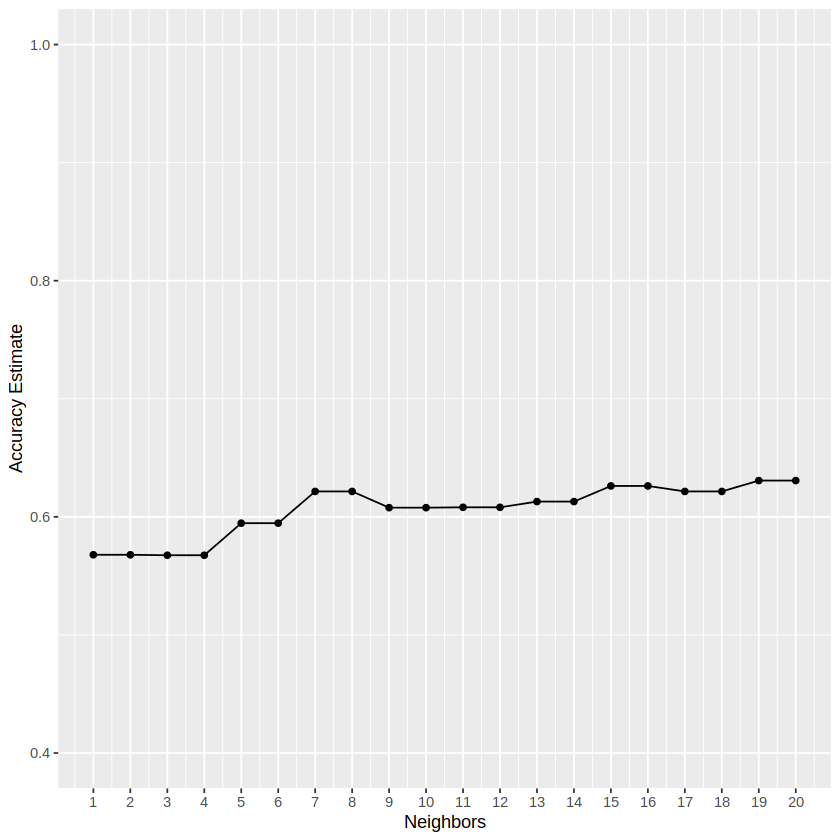

In [16]:
#plotting accuracy
options(repr.plot.width = 7, repr.plot.height = 7)
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(1, 20, by = 1)) +  
       scale_y_continuous(limits = c(0.4, 1.0)) 
accuracy_versus_k

<font size = "1"> Figure 2 - Accuracy Vs. K Line Plot (Model 1)

We repeat the same steps for the other models below.

**Second Model:`thalach` and `oldpeak` (exercise induced data results)**

In [31]:
heart_disease_recipe_2 <- recipe(num ~ thalach + oldpeak  , data = heart_disease_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) 
heart_disease_recipe_2


heart_disease_vfold <- vfold_cv(heart_disease_train, v = 5, strata = num)

k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

knn_results <- workflow() |>
      add_recipe(heart_disease_recipe_2) |>
       add_model(heart_disease_spec) |>
       tune_grid(resamples = heart_disease_vfold, grid = k_vals) |>
       collect_metrics()

accuracies <- knn_results |> 
       filter(.metric == "accuracy")
accuracies

max_accuracies <- summarize(accuracies, accuracy = max(mean))

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

! Fold1: internal:
  There were 20 warnings in `dplyr::summarise()`.
  The first warning was:
  ℹ In argument: `.estimate = metric_fn(...)`.
  ℹ In group 1: `neighbors = 1`.
  Caused by warning:
  ! No observations were detected in `truth` for level(s): '2'...
  Computation will proceed by ignoring those levels.
  ℹ Run `dplyr::last_dplyr_warnings()` to see the 19 ...

! Fold2: internal:
  There were 20 warnings in `dplyr::summarise()`.
  The first warning was:
  ℹ In argument: `.estimate = metric_fn(...)`.
  ℹ In group 1: `neighbors = 1`.
  Caused by warning:
  ! No observations were detected in `truth` for level(s): '2'...
  Computation will proceed by ignoring those levels.
  ℹ Run `dplyr::last_dplyr_warnings()` to see the 19 ...

! Fold3: internal:
  There were 20 warnings in `dplyr::summarise()`.
  The first warning was:
  ℹ In argument: `.estimate = metric_fn(...)`.
  ℹ In group 1: `neighbors = 1`.
  Caused by warning:
  ! No observations were detected in `truth` for level(s): '2

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.6673737,5,0.04653311,Preprocessor1_Model01
2,accuracy,multiclass,0.6943434,5,0.04368188,Preprocessor1_Model02
3,accuracy,multiclass,0.7124242,5,0.05292524,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
18,accuracy,multiclass,0.7349495,5,0.03722239,Preprocessor1_Model18
19,accuracy,multiclass,0.7439394,5,0.03740751,Preprocessor1_Model19
20,accuracy,multiclass,0.7484848,5,0.03920539,Preprocessor1_Model20


<font size = "1"> Table 7 - Aggregated Mean and Std. Error across the Folds (Model 2)

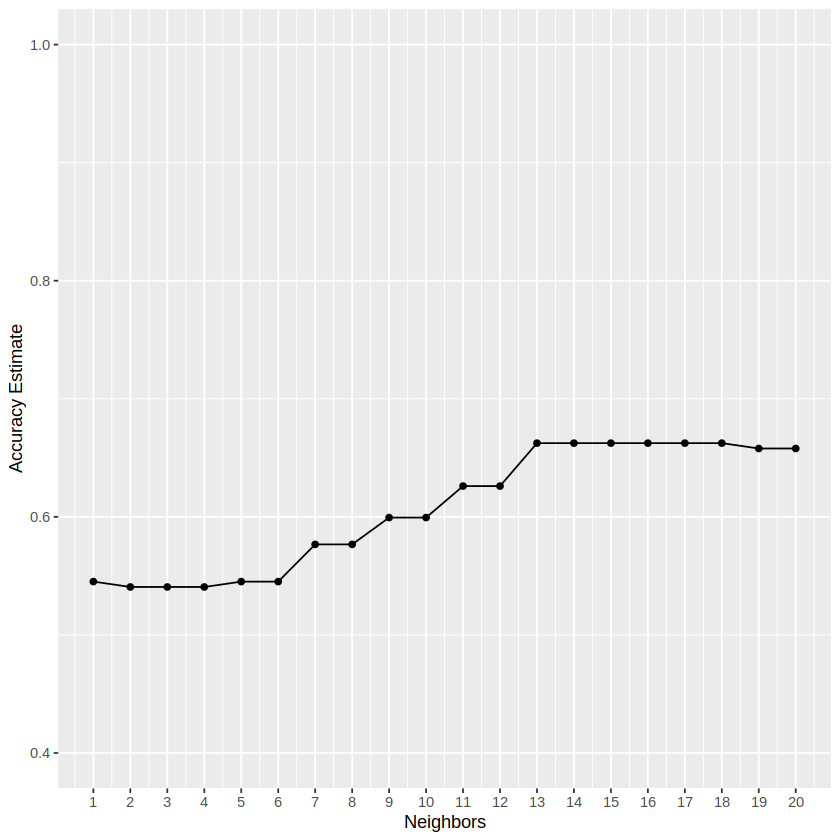

In [39]:
options(repr.plot.width = 7, repr.plot.height = 7)
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(1, 20, by = 1)) + 
       scale_y_continuous(limits = c(0.4, 1.0)) 
accuracy_versus_k

<font size = "1"> Figure 3 - Accuracy Vs. K Line Plot (Model 2)

**Third Model: `ca` (refers to the fluoroscopy for coronary calcium results)**

In [36]:
heart_disease_recipe_3 <- recipe(num ~ ca , data = heart_disease_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) 
heart_disease_recipe_3

heart_disease_vfold <- vfold_cv(heart_disease_train, v = 5, strata = num)

k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

knn_results <- workflow() |>
      add_recipe(heart_disease_recipe_3) |>
       add_model(heart_disease_spec) |>
       tune_grid(resamples = heart_disease_vfold, grid = k_vals) |>
       collect_metrics()

accuracies <- knn_results |> 
       filter(.metric == "accuracy")
accuracies

max_accuracies <- summarize(accuracies, accuracy = max(mean))


Recipe

Inputs:

      role #variables
   outcome          1
 predictor          1

Operations:

Scaling for all_predictors()
Centering for all_predictors()

! Fold1: internal:
  There were 20 warnings in `dplyr::summarise()`.
  The first warning was:
  ℹ In argument: `.estimate = metric_fn(...)`.
  ℹ In group 1: `neighbors = 1`.
  Caused by warning:
  ! No observations were detected in `truth` for level(s): '2'...
  Computation will proceed by ignoring those levels.
  ℹ Run `dplyr::last_dplyr_warnings()` to see the 19 ...

! Fold2: internal:
  There were 20 warnings in `dplyr::summarise()`.
  The first warning was:
  ℹ In argument: `.estimate = metric_fn(...)`.
  ℹ In group 1: `neighbors = 1`.
  Caused by warning:
  ! No observations were detected in `truth` for level(s): '2'...
  Computation will proceed by ignoring those levels.
  ℹ Run `dplyr::last_dplyr_warnings()` to see the 19 ...

! Fold3: internal:
  There were 20 warnings in `dplyr::summarise()`.
  The first warning was:
  ℹ In argument: `.estimate = metric_fn(...)`.
  ℹ In group 1: `neighbors = 1`.
  Caused by warning:
  ! No observations were detected in `truth` for level(s): '2

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.5451515,5,0.006363636,Preprocessor1_Model01
2,accuracy,multiclass,0.5406061,5,0.002969078,Preprocessor1_Model02
3,accuracy,multiclass,0.5406061,5,0.002969078,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
18,accuracy,multiclass,0.6624242,5,0.01587948,Preprocessor1_Model18
19,accuracy,multiclass,0.6578788,5,0.01512422,Preprocessor1_Model19
20,accuracy,multiclass,0.6578788,5,0.01512422,Preprocessor1_Model20


<font size = "1"> Table 8 - Aggregated Mean and Std. Error across the Folds (Model 3)

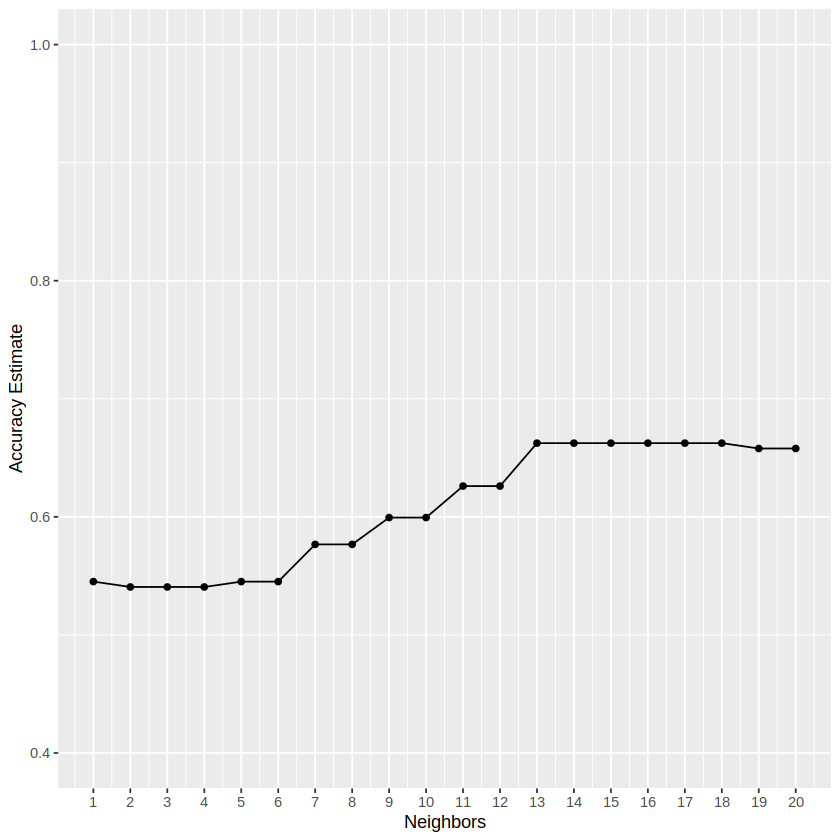

In [37]:
options(repr.plot.width = 7, repr.plot.height = 7)
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(1, 20, by = 1)) + 
       scale_y_continuous(limits = c(0.4, 1.0)) 
accuracy_versus_k

<font size = "1"> Figure 4 - Accuracy Vs. K Line Plot (Model 3)

Going back to our first model, we now recreate the model using the best `k` value as identified in the steps above. we also fit the workflow with our training data set.

In [40]:
#recreate the model using the best K value
knn_spec_1 <- nearest_neighbor(weight_func = "rectangular", neighbors = 19) |>
  set_engine("kknn") |>
  set_mode("classification")
knn_spec_1

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 19
  weight_func = rectangular

Computational engine: kknn 


In [41]:
#fit the model with train data
knn_fit_1 <- workflow() |>
  add_recipe(heart_disease_recipe_1) |>
  add_model(knn_spec_1) |>
  fit(data = heart_disease_train)
knn_fit_1

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(19,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3558559
Best kernel: rectangular
Best k: 19

Lastly, we predict the target value with the test data and find out the accuracy of our classification.

In [43]:
#predict the target value with test data and find out the accuracy
heart_disease_test_predictions_1 <- predict(knn_fit_1, heart_disease_test) |>
  bind_cols(heart_disease_test)|>
  metrics(truth = num, estimate = .pred_class) |>
  filter(.metric == "accuracy")

heart_disease_test_predictions_1

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.52


<font size = "1"> Table 9 - Model 1 Prediction Accuracy with Optimal K

We recreate the same steps with the other two models.

In [32]:
#Do the same with the second model we created above
knn_spec_2 <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) |>
  set_engine("kknn") |>
  set_mode("classification")
knn_spec_2

knn_fit_2 <- workflow() |>
  add_recipe(heart_disease_recipe_2) |>
  add_model(knn_spec_2) |>
  fit(data = heart_disease_train)
knn_fit_2

heart_disease_test_predictions_2 <- predict(knn_fit_2, heart_disease_test) |>
  bind_cols(heart_disease_test)|>
  metrics(truth = num, estimate = .pred_class) |>
  filter(.metric == "accuracy")

heart_disease_test_predictions_2

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 7
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(7,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2972973
Best kernel: rectangular
Best k: 7

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.64


<font size = "1"> Table 10 - Model 2 Prediction Accuracy with Optimal K

In [33]:
#Do the same with the second model we created above
knn_spec_3 <- nearest_neighbor(weight_func = "rectangular", neighbors = 13) |>
  set_engine("kknn") |>
  set_mode("classification")
knn_spec_3

knn_fit_3 <- workflow() |>
  add_recipe(heart_disease_recipe_3) |>
  add_model(knn_spec_3) |>
  fit(data = heart_disease_train)
knn_fit_3

heart_disease_test_predictions_3 <- predict(knn_fit_3, heart_disease_test) |>
  bind_cols(heart_disease_test)|>
  metrics(truth = num, estimate = .pred_class) |>
  filter(.metric == "accuracy")

heart_disease_test_predictions_3

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 13
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(13,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3378378
Best kernel: rectangular
Best k: 13

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.68


<font size = "1"> Table 11 - Model 3 Prediction Accuracy with Optimal K

### Discussion
Through extensive data exploration and pre-processing, we selected potential variables and categorized various factors. We created three distinct models based on different feature variables, each connected with angiographic disease status. This project significantly contributes to predicting the presence of heart disease based on patients' health conditions. 

Overall, our models demonstrated an accuracy consistently above 50%, aligning with our definition of “predictable” . These variables prove effective in predicting the presence or absence of heart disease in patients. 

Leveraging these findings in conjunction with patient clinical and demographic data, we want to create a precision medicine framework for heart disease prediction. Collaborations between healthcare professionals and our models can notably enhance diagnostic accuracy and confidence while reducing the possibility of misdiagnosis.

Despite achieving accuracies surpassing 68% with limited data, these models are not yet suitable for direct clinical use. Medical model evaluations typically involve offline and on-line assessments. Presently, our evaluations are solely offline and based on historical data, potentially deviating from real-life scenarios. To ensure ongoing model relevance, live data integration is imperative. 

Additionally, to enhance accuracy, further model diversification and selection based on the outlined methodology could be pursued. In the future, we are interested in identifying additional crucial factors influencing model judgments beyond what Knn offers and assessing the deployability and practical applicability of our models in real-world healthcare settings remain essential considerations

### References 

Jain, V., Chatterjee, J. M., SpringerLink (Online service), & Springer Intelligent Technologies and Robotics eBooks 2020 English/International. (2020). In Jain V., Chatterjee J. M.(Eds.), Machine learning with health care perspective: Machine learning and healthcare (1st 2020.;1;1st; ed.). Springer International Publishing. https://doi.org/10.1007/978-3-030-40850-3

Jindal, H., Agrawal, S., Khera, R., Jain, R., & Nagrath, P. (2021). Heart disease prediction using machine learning algorithms. IOP Conference Series. Materials Science and Engineering, 1022(1), 12072. https://doi.org/10.1088/1757-899X/1022/1/012072